# --- MonteCarlo Method ---


### We import the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import datetime as dt
from scipy.stats import norm

### Starting and ending date

In [6]:
years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = years * 365)

In [7]:
portfolio_value = 1000000
assets = ['BND', 'QQQ', 'GLD','SPY','VTI']

### We get the adjusted close for the assets

In [8]:
adj_close_df = pd.DataFrame()
data = yf.download(assets, start = startDate, end = endDate, auto_adjust = False)
adj_close_df = data['Adj Close'] 
print(adj_close_df)

[*********************100%***********************]  5 of 5 completed

Ticker            BND         GLD         QQQ         SPY         VTI
Date                                                                 
2010-11-04  54.034679  136.029999   47.042805   93.314140   48.054493
2010-11-05  53.806705  136.380005   47.042805   93.665268   48.269226
2010-11-08  53.819710  137.779999   47.104160   93.489723   48.207867
2010-11-09  53.546192  135.589996   46.849995   92.818047   47.832081
2010-11-10  53.526649  137.240005   47.086647   93.192024   48.039120
...               ...         ...         ...         ...         ...
2025-10-24  75.019997  377.519989  617.099976  677.250000  333.709991
2025-10-27  75.059998  367.010010  628.090027  685.239990  337.429993
2025-10-28  75.099998  364.380005  632.919983  687.059998  337.950012
2025-10-29  74.730003  363.000000  635.770020  687.390015  337.709991
2025-10-30  74.599998  370.130005  626.049988  679.830017  334.079987

[3770 rows x 5 columns]


### Calculate the daily log returns

In [12]:
log_returns = np.log(adj_close_df/adj_close_df.shift(1))
log_returns = log_returns.dropna()
print(log_returns)

Ticker           BND       GLD       QQQ       SPY       VTI
Date                                                        
2010-11-05 -0.004228  0.002570  0.000000  0.003756  0.004459
2010-11-08  0.000242  0.010213  0.001303 -0.001876 -0.001272
2010-11-09 -0.005095 -0.016023 -0.005410 -0.007210 -0.007826
2010-11-10 -0.000365  0.012096  0.005039  0.004021  0.004319
2010-11-11  0.000365  0.003056 -0.006349 -0.003774 -0.002717
...              ...       ...       ...       ...       ...
2025-10-24  0.001334 -0.003358  0.010622  0.008139  0.008124
2025-10-27  0.000533 -0.028234  0.017652  0.011729  0.011086
2025-10-28  0.000533 -0.007192  0.007660  0.002652  0.001540
2025-10-29 -0.004939 -0.003794  0.004493  0.000480 -0.000710
2025-10-30 -0.001741  0.019451 -0.015407 -0.011059 -0.010807

[3769 rows x 5 columns]


### Calculate the portfolio expected returns

In [22]:
def expected_returns(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

### Calculate the portfolio standard deviation

In [23]:
def standard_deviation(weights, cov_matrix):
    return np.sqrt(weights.T @ cov_matrix @ weights)

### Create the covariance matrix

In [24]:
cov_matrix = log_returns.cov()
print(cov_matrix)

Ticker           BND       GLD       QQQ           SPY       VTI
Ticker                                                          
BND     9.618273e-06  0.000009  0.000002  9.092011e-07  0.000001
GLD     9.184736e-06  0.000099  0.000006  4.425662e-06  0.000005
QQQ     1.714335e-06  0.000006  0.000171  1.318559e-04  0.000134
SPY     9.092011e-07  0.000004  0.000132  1.174653e-04  0.000120
VTI     1.126737e-06  0.000005  0.000134  1.196185e-04  0.000123


### Create an equally weighted portfolio

In [26]:
portfolio_value = 1000000

weights = np.array([1/len(assets)]*len(assets))
print(weights)
portfolio_expected_returns = expected_returns(weights, log_returns)
std_dev = standard_deviation(weights, cov_matrix)


[0.2 0.2 0.2 0.2 0.2]


### Create a Z-function that follows a normal law N (0,1)

In [30]:
def z_function():
    return np.random.normal(0,1)

### Create a GainLossScenario function

In [33]:
def GainLossScenario(portfolio_value, z_score, days, std_dev):
    return portfolio_value*days*portfolio_expected_returns + portfolio_value*z_score*np.sqrt(days)*std_dev

### 1000 Monte Carlo Simulations

In [35]:
n = 1000
scenarioArray = []
days = 5
for i in range(n):
    z_score = z_function()
    scenarioArray.append(GainLossScenario(portfolio_value, z_score, days, std_dev))

### VaR and plot

24260.695102250353


C:\Users\maxim\AppData\Local\Temp\ipykernel_21512\1321095627.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


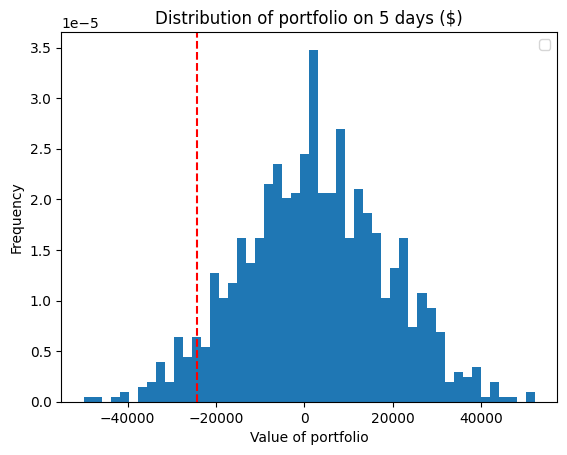

In [38]:
confidence_level = 0.95
VaR = -np.percentile(scenarioArray, 100*(1-confidence_level))
print(VaR)

plt.hist(scenarioArray, bins = 50, density=True)
plt.xlabel("Value of portfolio")
plt.ylabel("Frequency")
plt.title(f"Distribution of portfolio on {days} days ($)")
plt.axvline(-VaR, color = 'r', linestyle = 'dashed')
plt.legend()
plt.show()
